In [1]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import numpy as np
import os
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau



In [14]:
data_dir = pathlib.Path("/content/drive/MyDrive/TCC_DOCS/images")
print(data_dir)

/content/drive/MyDrive/TCC_DOCS/images


In [15]:
np.random.seed(1000)

image_shape = 100
batch_size = 100
AlexNet = Sequential()

# Primeira camada convolucional
AlexNet.add(Conv2D(filters=96, input_shape=(image_shape, image_shape, 3), kernel_size=(11, 11), strides=(4, 4), padding='same'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Segunda camada convolucional
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Terceira camada convolucional
AlexNet.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
AlexNet.add(Activation('relu'))

# Quarta camada convolucional
AlexNet.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
AlexNet.add(Activation('relu'))

# Quinta camada convolucional
AlexNet.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Camadas densas
AlexNet.add(Flatten())
AlexNet.add(Dense(4096))
AlexNet.add(Activation('relu'))

AlexNet.add(Dense(4096))
AlexNet.add(Activation('relu'))

AlexNet.add(Dense(1000))
AlexNet.add(Activation('relu'))

# Camada de saída
AlexNet.add(Dense(5))
AlexNet.add(Activation('softmax'))

# Resumo do modelo
AlexNet.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 25, 25, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 25, 25, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 13, 13, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 7, 7, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 7, 7, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 7, 7, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1000)                │       4,097,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │           5,005 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 41,411,829 (157.97 MB)

 Trainable params: 41,411,829 (157.97 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [18]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=123,
    label_mode="categorical",
    image_size=(image_shape, image_shape),
    batch_size=batch_size
    )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode="categorical",
    image_size=(image_shape,image_shape),
    batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=123,
    label_mode="categorical",
    image_size=(image_shape,image_shape),
    batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 47813 files belonging to 5 classes.
Found 47813 files belonging to 5 classes.
Using 9562 files for validation.
Found 47813 files belonging to 5 classes.
['basal_cell_carcinoma', 'melanoma', 'nevus', 'seborreheic_keratosis', 'squamous_cellcarcinoma']


In [19]:
for image_batch, labels_batch in train_ds:
  train_img = image_batch
  train_labels = labels_batch
  break
for image_batch, labels_batch in val_ds:
  val_img = image_batch
  val_labels = labels_batch
  break
for image_batch, labels_batch in test_ds:
  print(image_batch.shape)
  test_img = image_batch
  test_labels = labels_batch
  break

(100, 100, 100, 3)


In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
epochs = 50



history = AlexNet.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds
    )

Epoch 1/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 3604s 86ms/step - accuracy: 0.6702 - loss: 22.1714 - val_accuracy: 0.7002 - val_loss: 0.8258
Epoch 2/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7050 - loss: 0.8113 - val_accuracy: 0.7290 - val_loss: 0.7302
Epoch 3/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7292 - loss: 0.7303 - val_accuracy: 0.7281 - val_loss: 0.7345
Epoch 4/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7428 - loss: 0.6938 - val_accuracy: 0.7519 - val_loss: 0.6598
Epoch 5/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7562 - loss: 0.6517 - val_accuracy: 0.7526 - val_loss: 0.6732
Epoch 6/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7619 - loss: 0.6447 - val_accuracy: 0.7597 - val_loss: 0.6256
Epoch 7/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7651 - loss: 0.6272 - val_accuracy: 0.7719 - val_loss: 0.6208
Epoch 8/50
479/479 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7621 - loss: 0.6426 - val_accurac

In [22]:
loss, acc = AlexNet.evaluate(test_ds)
print("Accuracy", acc)

479/479 ━━━━━━━━━━━━━━━━━━━━ 126s 264ms/step - accuracy: 0.9714 - loss: 0.0932
Accuracy 0.9715349674224854


In [26]:
# prompt: print the classification report
import numpy as np
from sklearn.metrics import classification_report


# Get predictions for the test set
y_pred = AlexNet.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)


y_true = tf.concat([y for x, y in test_ds], axis=0).numpy()
# Convert y_true to class indices
y_true_classes = np.argmax(y_true, axis=1)

# Print the classification report
print(classification_report(y_true_classes, y_pred_classes))


479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4767
           1       0.96      0.93      0.95      7226
           2       0.98      0.99      0.99     32614
           3       0.95      0.86      0.90      1905
           4       0.96      0.85      0.90      1301

    accuracy                           0.97     47813
   macro avg       0.96      0.92      0.94     47813
weighted avg       0.97      0.97      0.97     47813



In [31]:
y_pred=np.argmax(AlexNet.predict(test_img), axis=-1)

# Convert test_labels to class indices
test_labels = np.argmax(test_labels, axis=1)

con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred).numpy()



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [32]:
import pandas as pd

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = class_names,
                     columns = class_names)

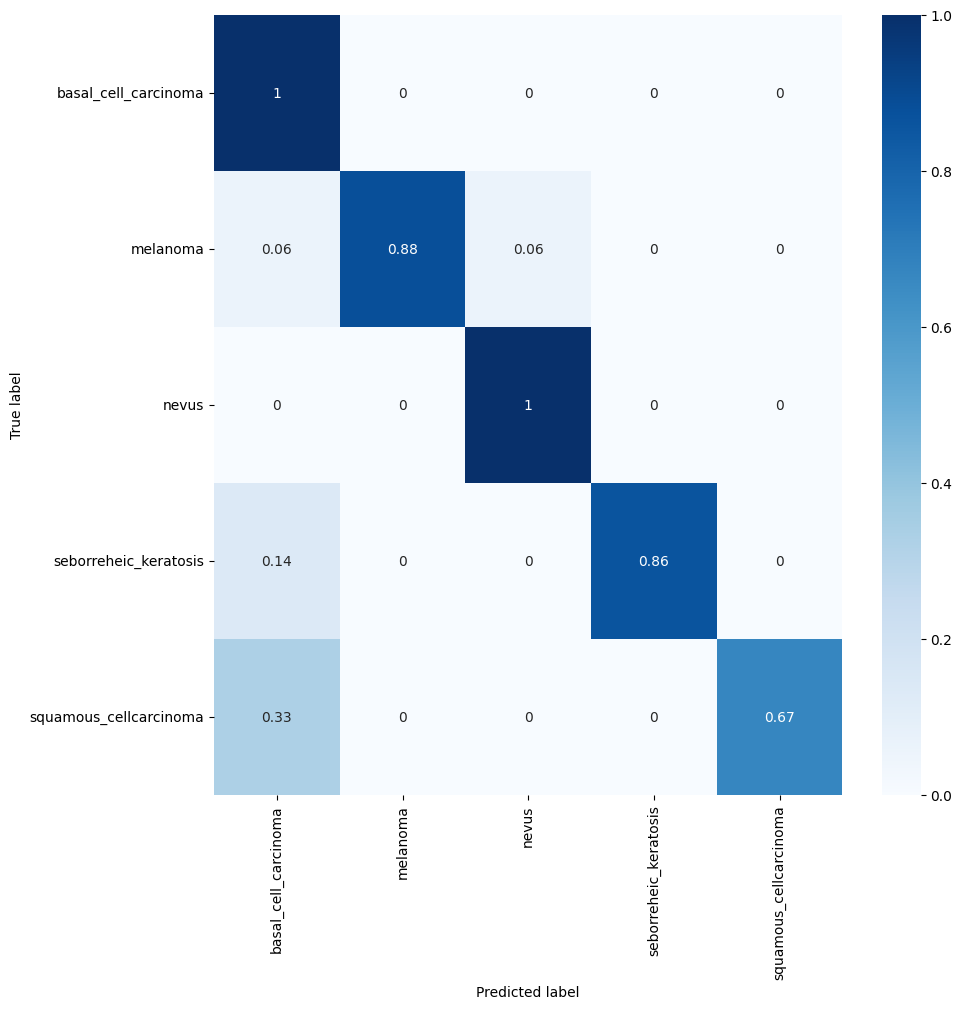

In [33]:
import seaborn as sns

figure = plt.figure(figsize=(10, 10))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()